## SOOVITUSSÜSTEEM KURSUSTELE REGISTREERUMISEKS

#SISSEJUHATUS

Andmed on pärit Moodle´st, kus ettevõte pakub kursusi liikmesriikidele, kes kasutavad erinevaid suuremahulisi IT-süsteeme julgeoleku tagamiseks EL-is. Neid suuri süsteeme on umbes 7. Igas liikmesriigis on tehnilised inimesed, IT süsteemide eest vastutavad ning ettevõte varustab neid tehniliste teadmistega. Ehk siis, anonümiseeritud kasutajad andmete hulgas on õppijad kes on teinud omi valikuid kursuste osas lähtuvalt sellest, mis nende vastutusvaldkonda kuulub. Projekti raames on meie huvi uurida kahte küsimust:
1. kas andmete pinnalt on võimalik luua soovitussüsteemi, mis soovitab kasutajale võimalikku järgmist huvipakkuvat kursust?
2. missugused kursused käivad üksteisega koos?


# Andmetega tutvumine


In [ ]:
#Järgnevate käsklustega tegime exceli failist csv faili. Exceli programmiga csv-ks salvestades, läks osa andmeid kaduma
#df = pd.read_excel('course-choices.xlsx')
#df.to_csv('course-choices-cl.csv')

In [ ]:
import pandas as pd

In [ ]:
#Jooksuta, kui andmed asuvad google drives. Jälgi teekonda failini
from google.colab import drive
drive.mount('/content/drive')

#df = pd.read_csv('/content/drive/MyDrive/kool/Masinope/Projekt/course-choices-cl.csv')
df = pd.read_csv('/content/drive/MyDrive/course-choices-cl.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#JOOKUSTA AINULT SIIS, kui csv fail on tõstetud colabi, mitte google drive-i
#df = pd.read_csv('course-choices-cl.csv')

In [ ]:
df.head()

,Unnamed: 0,system_category,release_year,course_name,course_shortname,user,country,eventname,enr_date
0,0,ETIAS,2022,ETIAS Watchlist,ETIAS Watchlist 2022,U1,CZ,\core\event\user_enrolment_created,2023-01-05 06:58:25
1,1,ETIAS,2022,ETIAS Watchlist,ETIAS Watchlist 2022,U2,PL,\core\event\user_enrolment_created,2023-01-05 08:04:18
2,2,ETIAS,2022,ETIAS Watchlist,ETIAS Watchlist 2022,U3,PT,\core\event\user_enrolment_created,2023-01-05 08:18:44
3,3,Horizontal,2022,sBMS and Biometric Data Quality,sBMS and Biometric Data Quality 2022,U4,DK,\core\event\user_enrolment_created,2023-01-05 09:05:21
4,4,ETIAS,2022,ETIAS Watchlist,ETIAS Watchlist 2022,U5,LV,\core\event\user_enrolment_created,2023-01-05 09:14:34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3034 non-null   int64 
 1   system_category   3034 non-null   object
 2   release_year      3034 non-null   int64 
 3   course_name       3034 non-null   object
 4   course_shortname  3034 non-null   object
 5   user              3034 non-null   object
 6   country           1969 non-null   object
 7   eventname         3034 non-null   object
 8   enr_date          3034 non-null   object
dtypes: int64(2), object(7)
memory usage: 213.5+ KB


Kontrollime, kas esineb tekstilisel kujul andmetes erinevusi / vigu.

In [ ]:
print(df.system_category.unique())
print(df.system_category.value_counts())

['ETIAS' 'Horizontal' 'VIS' 'ECRIS-TCN' 'EES' 'SIS' 'Interoperability'
 'Eurodac' 'News']
ETIAS               796
Interoperability    529
SIS                 508
EES                 475
VIS                 226
ECRIS-TCN           198
Eurodac             173
Horizontal           98
News                 31
Name: system_category, dtype: int64


In [ ]:
#print(df.course_name.unique())
print(df.course_name.value_counts())

Interoperability Essentials                         228
ETIAS Essentials                                    169
ETIAS Software for Central Unit (mock-ups based)    148
VIS Essentials                                      136
Eurodac Essentials                                  127
                                                   ... 
EURODAC Single Point of Contact / Service Desk        1
SIS Community space                                   1
The new SIS for SIRENE profile                        1
Schengen Evaluation CY                                1
Schengen Evaluation LV                                1
Name: course_name, Length: 92, dtype: int64


Erinevaid kursuseid on andmestikus palju (92 erinevat), kuid nende nimed tunduvad olevat korrektsed.

In [ ]:
print(df.user.value_counts())

U383    67
U253    29
U18     26
U400    24
U589    23
        ..
U627     1
U329     1
U330     1
U331     1
U917     1
Name: user, Length: 917, dtype: int64


In [ ]:
df.isna().sum()

Unnamed: 0             0
system_category        0
release_year           0
course_name            0
course_shortname       0
user                   0
country             1065
eventname              0
enr_date               0
dtype: int64

Puuduvad väärtused ainult tulbas riik. Meid ei sega mudelite tegemisel.

Visualiseerime 10 populaarsemat kursust ehk valime esinemissageduseks rohkem kui 80 korda.

In [ ]:
kursuste_arvud = df['course_name'].value_counts()

valitud_kursused = []
valitud_kursuste_esinemine = []

for i, c in kursuste_arvud.items():
  if c > 80:
    valitud_kursused.append(i);

for i, c in kursuste_arvud.items():
  if c > 80:
    valitud_kursuste_esinemine.append(c);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



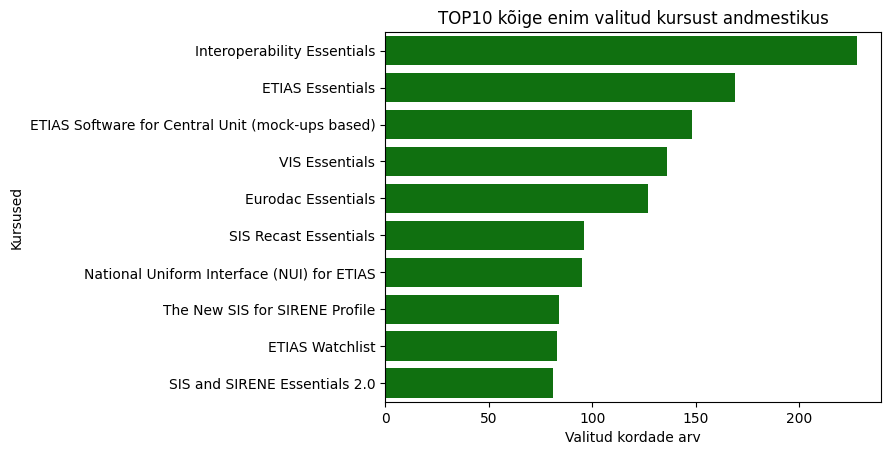

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y = valitud_kursused, x = valitud_kursuste_esinemine, color="green");
plt.ylabel("Kursused");
plt.xlabel("Valitud kordade arv");
plt.title("TOP10 kõige enim valitud kursust andmestikus");

In [ ]:
print(kursuste_arvud.sum())
sum(valitud_kursuste_esinemine)

3034


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1247

TOP 10 kurust moodustavad peaaegu pooled kõikidest registreeringutest

# Andmete ette valmistamine

##Treening ja testandmete tegemine

Valisime train_size -ks 0.9, sest andmeid on vähe ja tahame treenimiseks võimalikult palju andmeid kasutada

In [ ]:
#jagame andmed test ja treeningandmeteks (registreerumise kuupäeva järgi)
from sklearn.model_selection import train_test_split

train_size = 0.9
num_train_samples = int(len(df) * train_size)
split_date = df['enr_date'].sort_values().iloc[num_train_samples]
train = df[df['enr_date'] <= split_date]
test = df[df['enr_date'] > split_date]

train.shape, test.shape



((2731, 9), (303, 9))

In [ ]:
#Muudame tulpade nimed nii test kui treeningandmestikus.
#See on vajalik, et mudelid saaksid aru, milliseid tulpasid kasutada
test = test.rename(columns={'user': 'user_id', 'course_name' : 'item_id'})
train = train.rename(columns={'user': 'user_id', 'course_name' : 'item_id'})

In [ ]:
# Kasutasime kuupäeva andmete jagamiseks, mis tähendab, et kasutajad ja kursused
# treening- ja testandmestikus ei ole samad. Meil on test andmestikus kasutajaid,
# kes ei ole ühegi kursusega seotud ja
# kursused mida ei ole keegi valinud. Eemaldame tühjad seosed.

import numpy as np

train_users = train.user_id.unique()
train_items = train.item_id.unique()
test_users = test.user_id.unique()
test_items = test.item_id.unique()
warm_users = test_users[np.isin(test_users, train_users)]
warm_items = test_items[np.isin(test_items, train_items)]

print(test.shape)
test = test[test['user_id'].isin(warm_users) & test['item_id'].isin(warm_items)]
print(test.shape)

(303, 9)
(98, 9)


In [ ]:
#Kontrollime, et train ja test andmestikud oleksid õiged

item_id_check = test.item_id.isin(train.item_id).all()
print(f"Kõik kursused testandmestikus on samad, mis treeningndmestikus: {item_id_check}")

# Check if all user IDs in the training set are present in the test set
user_id_train_check = train.user_id.isin(test.user_id).all()
print(f"Kõik kasutajad treeningandmestikus on samad, mis testandmestikus: {user_id_train_check}")

# Check if all user IDs in the test set are present in the training set
user_id_test_check = test.user_id.isin(train.user_id).all()
print(f"Kõik kasutajad testandmestikus on samad, mis treeningandmestikus: {user_id_test_check}")


Kõik kursused testandmestikus on samad, mis treeningndmestikus: True
Kõik kasutajad treeningandmestikus on samad, mis testandmestikus: False
Kõik kasutajad testandmestikus on samad, mis treeningandmestikus: True


See sobib meile, sest meil on rohkem andmeid millega mudelit treenida, aga testandmestikus on kõik samad kasutajad, kes treeningandmestikuski. See tähendab, et me saame mudeli headust hinnata

##Maatriksi moodustamine *pivot* meetodil, kus veergudes asuvad kasutajad ning tulpades kursused.

In [ ]:
df.head()

,Unnamed: 0,system_category,release_year,course_name,course_shortname,user,country,eventname,enr_date
0,0,ETIAS,2022,ETIAS Watchlist,ETIAS Watchlist 2022,U1,CZ,\core\event\user_enrolment_created,2023-01-05 06:58:25
1,1,ETIAS,2022,ETIAS Watchlist,ETIAS Watchlist 2022,U2,PL,\core\event\user_enrolment_created,2023-01-05 08:04:18
2,2,ETIAS,2022,ETIAS Watchlist,ETIAS Watchlist 2022,U3,PT,\core\event\user_enrolment_created,2023-01-05 08:18:44
3,3,Horizontal,2022,sBMS and Biometric Data Quality,sBMS and Biometric Data Quality 2022,U4,DK,\core\event\user_enrolment_created,2023-01-05 09:05:21
4,4,ETIAS,2022,ETIAS Watchlist,ETIAS Watchlist 2022,U5,LV,\core\event\user_enrolment_created,2023-01-05 09:14:34


In [ ]:
#Treening maatriksi tegemine
uus_df = train[["user_id", "item_id"]]
uus_df

,user_id,item_id
0,U1,ETIAS Watchlist
1,U2,ETIAS Watchlist
2,U3,ETIAS Watchlist
3,U4,sBMS and Biometric Data Quality
4,U5,ETIAS Watchlist
...,...,...
2726,U816,ETIAS and Interoperability Awareness
2727,U825,Interoperability CIR-MID CS.SIM webinar
2728,U816,ETIAS Watchlist
2729,U391,Technical components of interoperability


Kustutame duplikaatread, sest andmestikus on andmeid, kus kasutaja on mitu korda registreerunud samale kursusele. Tõenäoliselt on seda tehtud, sest esimene kord jäi kursus lõpetamata ja registreeruti uuesti samale kursusele, mis toimus teisel ajal

In [ ]:
#duplikaatridade otsimine
duplicate_rows = uus_df.duplicated()
print(duplicate_rows.value_counts())

False    2720
True       11
dtype: int64


In [ ]:
#eemaldame duplikaadid
uus_df = uus_df.drop_duplicates()
uus_df

,user_id,item_id
0,U1,ETIAS Watchlist
1,U2,ETIAS Watchlist
2,U3,ETIAS Watchlist
3,U4,sBMS and Biometric Data Quality
4,U5,ETIAS Watchlist
...,...,...
2726,U816,ETIAS and Interoperability Awareness
2727,U825,Interoperability CIR-MID CS.SIM webinar
2728,U816,ETIAS Watchlist
2729,U391,Technical components of interoperability


In [ ]:
#maatriksi tegemiseks lisan tulba väärtusega "1", mis hakkab maatriksis tähistama kasutaja poolt valitud kursust
uus_df["number"] = 1
uus_df

<ipython-input-21-729a8bede0a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uus_df["number"] = 1


,user_id,item_id,number
0,U1,ETIAS Watchlist,1
1,U2,ETIAS Watchlist,1
2,U3,ETIAS Watchlist,1
3,U4,sBMS and Biometric Data Quality,1
4,U5,ETIAS Watchlist,1
...,...,...,...
2726,U816,ETIAS and Interoperability Awareness,1
2727,U825,Interoperability CIR-MID CS.SIM webinar,1
2728,U816,ETIAS Watchlist,1
2729,U391,Technical components of interoperability,1


In [ ]:
df_pivot = uus_df.pivot(index="user_id", columns="item_id", values="number")
df_pivot

item_id,DCC Enhancements,ECRIS-TCN Awareness,ECRIS-TCN Business Use Cases,ECRIS-TCN Essentials,ECRIS-TCN IS-CS.SIM Follow up,ECRIS-TCN IS-CS.SIM webinar,ECRIS-TCN Implementing Staff Profile - Part A - online course,ECRIS-TCN Implementing Staff Profile - Part A- webinar recording,ECRIS-TCN Testing Approach,EES Architecture and Interoperability,...,VIS Central Domain Simulator,VIS Essentials,VIS IT Operators Profile Course,VIS Incident and Request Management,VIS Interface Control Document (ICD) Analysis,VIS SPoC Profile Course,VIS Search Functions,VIS-EES Interoperability,eu-LISA Training Newsletter - Issue 11 - September 2023,sBMS and Biometric Data Quality
user_id,,,,,,,,,,,,,,,,,,,,,
U1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
U100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0
U97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#asendan Nan-id väärtusega 0, seal kasutaja kursust ei valinud
df_pivot = df_pivot.fillna(0)
df_pivot = df_pivot.astype(int) #eemaldasin komakoha, et jätta vaid täisarv

df_pivot #valmis Pivot maatriks

item_id,DCC Enhancements,ECRIS-TCN Awareness,ECRIS-TCN Business Use Cases,ECRIS-TCN Essentials,ECRIS-TCN IS-CS.SIM Follow up,ECRIS-TCN IS-CS.SIM webinar,ECRIS-TCN Implementing Staff Profile - Part A - online course,ECRIS-TCN Implementing Staff Profile - Part A- webinar recording,ECRIS-TCN Testing Approach,EES Architecture and Interoperability,...,VIS Central Domain Simulator,VIS Essentials,VIS IT Operators Profile Course,VIS Incident and Request Management,VIS Interface Control Document (ICD) Analysis,VIS SPoC Profile Course,VIS Search Functions,VIS-EES Interoperability,eu-LISA Training Newsletter - Issue 11 - September 2023,sBMS and Biometric Data Quality
user_id,,,,,,,,,,,,,,,,,,,,,
U1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
U100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
U97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Teen sama asja, aga originaal tabelile

originaal_df = df[["user", "course_name"]]
originaal_df = originaal_df.drop_duplicates()
originaal_df["number"] = 1
df_pivot_orig = originaal_df.pivot(index="user", columns="course_name", values="number")
df_pivot_orig = df_pivot_orig.fillna(0)
df_pivot_orig = df_pivot_orig.astype(int) #eemaldasin komakoha, et jätta vaid täisarv

df_pivot_orig #valmis Pivot maatriks

course_name,DCC Enhancements,ECRIS-TCN Awareness,ECRIS-TCN Business Use Cases,ECRIS-TCN Essentials,ECRIS-TCN IS-CS.SIM Follow up,ECRIS-TCN IS-CS.SIM webinar,ECRIS-TCN Implementing Staff Profile - Part A - online course,ECRIS-TCN Implementing Staff Profile - Part A- webinar recording,ECRIS-TCN Testing Approach,EES Architecture and Interoperability,...,VIS Essentials,VIS IT Operators Profile Course,VIS Incident and Request Management,VIS Interface Control Document (ICD) Analysis,VIS SPoC Profile Course,VIS Search Functions,VIS-EES Interoperability,eu-LISA Training Newsletter - Issue 11 - September 2023,eu-LISA Training Newsletter - Issue 12 - December 2023,sBMS and Biometric Data Quality
user,,,,,,,,,,,,,,,,,,,,,
U1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
U100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
U97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Andmete kodeerimine mudelite jaoks

In [ ]:
uus_df_coded = uus_df.copy(deep = True)

In [ ]:
# Kodeerimine ära test, treening ja treeningmaatriksi

from sklearn import preprocessing
ue = preprocessing.LabelEncoder()
ie = preprocessing.LabelEncoder()
train.loc[:, 'user_id'] = ue.fit_transform(train['user_id'])
train.loc[:, 'item_id'] = ie.fit_transform(train['item_id'])

test.loc[:, 'user_id'] = ue.transform(test['user_id'])
test.loc[:, 'item_id'] = ie.transform(test['item_id'])

uus_df_coded.loc[:, 'user_id'] = ue.transform(uus_df_coded['user_id'])
uus_df_coded.loc[:, 'item_id'] = ie.transform(uus_df_coded['item_id'])

<ipython-input-26-02a302c4eb55>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, 'user_id'] = ue.fit_transform(train['user_id'])
<ipython-input-26-02a302c4eb55>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, 'item_id'] = ie.fit_transform(train['item_id'])
<ipython-input-26-02a302c4eb55>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if colum

In [ ]:
#ie.classes_


In [ ]:
#Ma ei saa aru, aga millegi pärast on vaja seda cell-i kaks korda jooksutada,
#muidu ie.classes_ tuleb vale ja ei saa mudeleid treenida :S

#Sama, mis üleval teeme uuesti
train.loc[:, 'user_id'] = ue.fit_transform(train['user_id'])
train.loc[:, 'item_id'] = ie.fit_transform(train['item_id'])

test.loc[:, 'user_id'] = ue.transform(test['user_id'])
test.loc[:, 'item_id'] = ie.transform(test['item_id'])

uus_df_coded.loc[:, 'user_id'] = ue.transform(uus_df_coded['user_id'])
uus_df_coded.loc[:, 'item_id'] = ie.transform(uus_df_coded['item_id'])

Teeme eraldi coded maatriksi ka

In [ ]:
uus_df_coded

,user_id,item_id,number
0,0,33,1
1,111,33,1
2,222,33,1
3,333,89,1
4,444,33,1
...,...,...,...
2726,796,34,1
2727,806,46,1
2728,796,33,1
2729,324,70,1


In [ ]:
df_pivot_coded = uus_df_coded.pivot(index="user_id", columns="item_id", values="number")
df_pivot_coded

item_id,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0
823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#asendan Nan-id väärtusega 0, seal kasutaja kursust ei valinud
df_pivot_coded = df_pivot_coded.fillna(0)
df_pivot_coded = df_pivot_coded.astype(int) #eemaldasin komakoha, et jätta vaid täisarv

df_pivot_coded #valmis Pivot maatriks

item_id,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Soovitussüsteemi loomine



## Baseline mudel

In [ ]:
# Populaarsete kursuste soovitamine. Arvestame ka kasutaja ajalooga,
# et soovitada ainult neid kursusi mida kasutaja ei ole veel valinud.

trainset_metadata = train[train['item_id'].isin(ie.classes_)].reset_index(drop=True)
trainset_metadata['item_id'] = ie.transform(trainset_metadata['item_id'])
popularity = train.groupby('item_id')['user_id'].count().reset_index()
popularity.columns = ['item_id', 'popularity']
trainset_metadata = trainset_metadata.merge(popularity, on='item_id')



In [ ]:
trainset_metadata.head()

,Unnamed: 0,system_category,release_year,item_id,course_shortname,user_id,country,eventname,enr_date,popularity
0,0,ETIAS,2022,33,ETIAS Watchlist 2022,0,CZ,\core\event\user_enrolment_created,2023-01-05 06:58:25,82
1,1,ETIAS,2022,33,ETIAS Watchlist 2022,111,PL,\core\event\user_enrolment_created,2023-01-05 08:04:18,82
2,2,ETIAS,2022,33,ETIAS Watchlist 2022,222,PT,\core\event\user_enrolment_created,2023-01-05 08:18:44,82
3,4,ETIAS,2022,33,ETIAS Watchlist 2022,444,LV,\core\event\user_enrolment_created,2023-01-05 09:14:34,82
4,18,ETIAS,2022,33,ETIAS Watchlist 2022,56,CH,\core\event\user_enrolment_created,2023-01-05 15:30:22,82


In [ ]:
trainset_metadata['popularity'].describe()

count    2731.000000
mean       77.205053
std        60.234387
min         1.000000
25%        26.000000
50%        58.000000
75%       121.000000
max       215.000000
Name: popularity, dtype: float64

In [ ]:
learning_history = train.groupby('user_id')['item_id'].apply(set).to_dict()

In [ ]:
#learning_history

In [ ]:
top_k = 3

In [ ]:
pop_learning = train.item_id.value_counts()[:top_k*4].index.values
print(pop_learning)

[50 27 30 81 40 57 63 33 31 73 89 11]


In [ ]:
from tqdm import tqdm

learning_preds = {}
for user, history in tqdm(learning_history.items()):
    learning_preds[user] = [x for x in pop_learning if x not in history][:top_k]

print(len(learning_preds))


100%|██████████| 826/826 [00:00<00:00, 46689.42it/s]

826


In [ ]:
#learning_preds

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
!pip install rs_metrics


In [ ]:
#Tulemused kui anda populaarseid kursuseid ainult
from rs_metrics import ndcg, mrr, coverage, surprisal

results = pd.DataFrame(columns=[f'NDCG@{top_k}', f'MRR@{top_k}', f'Coverage@{top_k}', f'Surprisal@{top_k}'])
results.loc['PopCour'] = ndcg(test, learning_preds, top_k), \
mrr(test, learning_preds, top_k), coverage(train.item_id.unique(), learning_preds, top_k), \
surprisal(train, learning_preds, top_k)
results

,NDCG@3,MRR@3,Coverage@3,Surprisal@3
PopCour,0.063186,0.078947,0.122222,2.450776


    NDCG (Normalized Discounted Cumulative Gain):
        Meaning: NDCG is a metric that assesses the quality of the ranking of recommended items.
        It considers both the relevance of items and their positions in the ranking. Higher NDCG values indicate better rankings.

    MRR (Mean Reciprocal Rank):
        Meaning: MRR measures the average rank of the first relevant item. It focuses on the reciprocal of the rank of the first correct recommendation.
        Higher MRR values indicate better performance.

    Coverage:
        Meaning: Coverage measures the proportion of unique items in the entire item set that are recommended.
        It provides insight into the diversity of the recommended items.

    Surprisal:
        Meaning: Surprisal evaluates the unexpectedness or novelty of recommended items.
        Lower surprisal values indicate that recommendations are more aligned with user expectations.


Siit on näha, et inimesed ei vali populaarsuse järgi kursuseid

## ALS

Alternative Least Square method


In [ ]:
!pip install implicit

In [ ]:
## Järgmiseks tuleb teha mudel, mis vastavalt meie maatriksile soovitab kursuse. Teeme ALS

from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix
model = AlternatingLeastSquares(factors=100, iterations = 40)

matrix = csr_matrix(df_pivot)
model.fit(matrix, True)

/usr/local/lib/python3.10/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
preds, scores = model.recommend(test.user_id.unique(), matrix[test.user_id.unique()], top_k)

In [ ]:
als_preds = {u: p for u, p in zip(test.user_id.unique(), preds)}

In [ ]:
#als_preds

In [ ]:
results.loc['ALS'] = ndcg(test, als_preds, top_k), \
mrr(test, als_preds, top_k), coverage(train.item_id.unique(), als_preds, top_k), \
surprisal(train, als_preds, top_k)
results

,NDCG@3,MRR@3,Coverage@3,Surprisal@3
PopCour,0.063186,0.078947,0.122222,2.450776
ALS,0.081244,0.084795,0.722222,5.565752


Tulemused läksid natukene paremaks, aga siiski eriti täpselt ei ennusta. Paranes kõvasti coverage, ehk soovitatakse mitmekesiselmalt kursusi.

## ASSOCIATION MINING

## Apriori algoritmiga kogu andmestikust seoste leidmine:

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
frequent_itemsets = apriori(df_pivot_orig, min_support = 0.1, use_colnames = True, verbose = 1)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

Processing 24 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets,length
0,0.183206,(ETIAS Essentials),1
1,0.159215,(ETIAS Software for Central Unit (mock-ups bas...,1
2,0.138495,(Eurodac Essentials),1
3,0.247546,(Interoperability Essentials),1
4,0.103599,(National Uniform Interface (NUI) for ETIAS),1
5,0.104689,(SIS Recast Essentials),1
6,0.148310,(VIS Essentials),1
7,0.103599,"(ETIAS Essentials, ETIAS Software for Central ...",2
8,0.100327,"(Eurodac Essentials, ETIAS Essentials)",2
9,0.122137,"(ETIAS Essentials, Interoperability Essentials)",2


In [ ]:
rules = association_rules(frequent_itemsets , metric='lift', min_threshold=1) #min_threshold ehk kui kursus X on valitud, võime öelda, et kursust Y valitakse 60% või enam
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ETIAS Essentials),(ETIAS Software for Central Unit (mock-ups bas...,0.183206,0.159215,0.103599,0.565476,3.551655,0.074430,1.934958,0.879587
1,(ETIAS Software for Central Unit (mock-ups bas...,(ETIAS Essentials),0.159215,0.183206,0.103599,0.650685,3.551655,0.074430,2.338273,0.854488
2,(Eurodac Essentials),(ETIAS Essentials),0.138495,0.183206,0.100327,0.724409,3.954068,0.074954,2.963795,0.867199
3,(ETIAS Essentials),(Eurodac Essentials),0.183206,0.138495,0.100327,0.547619,3.954068,0.074954,1.904379,0.914669
4,(ETIAS Essentials),(Interoperability Essentials),0.183206,0.247546,0.122137,0.666667,2.693098,0.076785,2.257361,0.769693
5,(Interoperability Essentials),(ETIAS Essentials),0.247546,0.183206,0.122137,0.493392,2.693098,0.076785,1.612280,0.835507
6,(VIS Essentials),(ETIAS Essentials),0.148310,0.183206,0.105780,0.713235,3.893076,0.078608,2.848307,0.872540
7,(ETIAS Essentials),(VIS Essentials),0.183206,0.148310,0.105780,0.577381,3.893076,0.078608,2.015267,0.909818
8,(Interoperability Essentials),(ETIAS Software for Central Unit (mock-ups bas...,0.247546,0.159215,0.121047,0.488987,3.071239,0.081634,1.645330,0.896266
9,(ETIAS Software for Central Unit (mock-ups bas...,(Interoperability Essentials),0.159215,0.247546,0.121047,0.760274,3.071239,0.081634,3.138807,0.802106


Antud juhul on meil *support* ehk antud kursuste / kursuse-paaride esinemine andmestikus üsna väike (10-12%). Kõrgem *confidence* näitaja viitab asjaolule, et esimese kursuse valimine on tugev näitaja ka teise kursuse valimiseks. Meil jääb *confidence* kuskil 65-76% vahele.
Kui näitaja *lift* > 1, võib eeldada, et kahe kursuse vahel on suurem seos, ning see seos omab väärtust.
Kui võtta näiteks rida indeksiga 1, siis võib öelda, et kursust nimega "Eurodac Essentials" valitakse tõenäosusega ~14%, "ETIAS Essentials" kursust tõenäosusega ~18% ning ~72% nendest, kes valivad esimese kursuse, valivad ka teise kursuse.

In [ ]:
result = rules[['antecedents', 'consequents', 'confidence']];

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print("Sagedamini esinevad koos kursused:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(result)

Sagedamini esinevad koos kursused:
     support                                           itemsets  length
0   0.183206                                 (ETIAS Essentials)       1
1   0.159215  (ETIAS Software for Central Unit (mock-ups bas...       1
2   0.138495                               (Eurodac Essentials)       1
3   0.247546                      (Interoperability Essentials)       1
4   0.103599       (National Uniform Interface (NUI) for ETIAS)       1
5   0.104689                            (SIS Recast Essentials)       1
6   0.148310                                   (VIS Essentials)       1
7   0.103599  (ETIAS Essentials, ETIAS Software for Central ...       2
8   0.100327             (Eurodac Essentials, ETIAS Essentials)       2
9   0.122137    (ETIAS Essentials, Interoperability Essentials)       2
10  0.105780                 (VIS Essentials, ETIAS Essentials)       2
11  0.121047  (Interoperability Essentials, ETIAS Software f...       2
12  0.100327  (Eurodac Essent

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import plotly.express as px

# Convert antecedents and consequents to strings for display
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(x))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(x))

# Create a scatter plot with tooltips
fig = px.scatter(rules, x="support", y="confidence", size="lift",
                 hover_data=['antecedents_str', 'consequents_str'],
                 title="Association Rules Scatter Plot with Tooltips",
                 labels={'support': 'Support', 'confidence': 'Confidence'},
                 template='plotly_white')

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Apriori algoritmiga soovituste tegemine

In [ ]:
#allikas: https://python.plainenglish.io/association-rule-based-recommender-system-8f6d4af2c6a4

def as_recommender(rules_df, course, rec_count=4):
    sorted_rules = rules_df.sort_values("confidence", ascending=False)
    recommendation_set = set()  # Use a set to ensure uniqueness

    # Iterate through the sorted rules
    for i, product in enumerate(sorted_rules["antecedents"]):
        # Check if the specified course is in the antecedents
        if course in set(product):
            # Add the consequents to the set
            recommendation_set.update(set(sorted_rules.iloc[i]["consequents"]))

    # Convert the set to a list and return the first rec_count elements
    return list(recommendation_set)[:rec_count]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Proovime soovitada kursuse ja leitud seoste põhjal:

In [ ]:
as_recommender(rules, "Eurodac Essentials", 3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['VIS Essentials', 'ETIAS Essentials', 'Interoperability Essentials']

In [ ]:
as_recommender(rules, "VIS Essentials")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['Eurodac Essentials', 'ETIAS Essentials', 'Interoperability Essentials']

##Apriori algoritmiga tulemuste ennustamine

In [ ]:
frequent_itemsets_2 = apriori(df_pivot_coded, min_support = 0.05, use_colnames = True, verbose = 1)
frequent_itemsets_2['length'] = frequent_itemsets_2['itemsets'].apply(lambda x: len(x))
frequent_itemsets_2

Processing 6 combinations | Sampling itemset size 6


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets,length
0,0.064165,(3),1
1,0.053269,(9),1
2,0.073850,(11),1
3,0.060533,(15),1
4,0.070218,(19),1
...,...,...,...
76,0.083535,"(40, 81, 57, 27, 30)",5
77,0.083535,"(81, 50, 57, 27, 30)",5
78,0.083535,"(40, 81, 50, 57, 27)",5
79,0.084746,"(40, 81, 50, 57, 30)",5


In [ ]:
rules_2 = association_rules(frequent_itemsets_2 , metric='lift', min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#rules_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Sort the 'train' dataframe by 'user_id' and 'enr_date' in descending order
train_sorted = train.sort_values(['user_id', 'enr_date'], ascending=[True, False])
item_ids = train['item_id'].unique()
item_recommendations = {}

# Iterate over each user in the sorted 'train' dataframe
for user_id, group in train_sorted.groupby('user_id'):
    # Get the last purchased item for the user
    last_purchased_item = group.iloc[0]['item_id']

    # Recommend three new items based on the last purchase
    recommendations = as_recommender(rules_2, last_purchased_item, 3)
    item_recommendations[user_id] = recommendations

# Print or use the item_recommendations dictionary as needed
print(item_recommendations)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{0: [], 1: [], 2: [], 3: [40, 81, 50], 4: [], 5: [33, 40, 81], 6: [], 7: [], 8: [33, 40, 81], 9: [], 10: [], 11: [33, 40, 81], 12: [], 13: [], 14: [50, 30], 15: [33, 40, 81], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [27], 24: [], 25: [40, 81, 50], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [40, 50, 57], 33: [], 34: [27], 35: [50, 30], 36: [], 37: [40, 50, 57], 38: [], 39: [], 40: [], 41: [33, 40, 81], 42: [], 43: [33, 40, 81], 44: [], 45: [], 46: [], 47: [], 48: [27], 49: [], 50: [], 51: [33, 40, 81], 52: [40, 50, 57], 53: [], 54: [], 55: [], 56: [40, 81, 50], 57: [], 58: [], 59: [33, 40, 81], 60: [], 61: [33, 40, 81], 62: [], 63: [], 64: [], 65: [], 66: [33, 40, 81], 67: [], 68: [], 69: [33, 40, 81], 70: [33, 40, 81], 71: [33, 40, 81], 72: [33, 40, 81], 73: [], 74: [33, 40, 81], 75: [33, 40, 81], 76: [], 77: [50, 30], 78: [], 79: [33, 40, 81], 80: [], 81: [50, 30], 82: [33, 40, 81], 83: [], 84: [33, 40, 81], 85: [], 86: [], 87: [], 88: [], 89: [33, 40, 81],

In [ ]:
results.loc['ARL'] = ndcg(test, item_recommendations, top_k), \
mrr(test, item_recommendations, top_k), coverage(train.item_id.unique(), item_recommendations, top_k), \
surprisal(train, item_recommendations, top_k)
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars



,NDCG@3,MRR@3,Coverage@3,Surprisal@3
PopCour,0.063186,0.078947,0.122222,2.450776
ALS,0.081244,0.084795,0.722222,5.565752
ARL,0.011069,0.008772,0.077778,NaN
combined,0.057808,0.067251,0.122222,2.445351


See on nii sellepärast, et meil palju tühjasid väärtuseid

In [ ]:
#Teen kombineeritud variandi
# Iterate over keys in item_recommendations
for key in item_recommendations:
    # Check if the value in item_recommendations is an empty list
    if not item_recommendations[key]:
      item_recommendations[key] = learning_preds[key]

# Print the updated item_recommendations
print(item_recommendations)


{0: [50, 27, 30], 1: [50, 27, 30], 2: [27, 30, 81], 3: [40, 81, 50], 4: [50, 27, 30], 5: [33, 40, 81], 6: [50, 27, 30], 7: [50, 27, 30], 8: [33, 40, 81], 9: [50, 27, 30], 10: [50, 27, 30], 11: [33, 40, 81], 12: [30, 81, 40], 13: [50, 27, 81], 14: [50, 30], 15: [33, 40, 81], 16: [27, 81, 40], 17: [50, 27, 30], 18: [50, 27, 30], 19: [27, 30, 81], 20: [50, 27, 30], 21: [27, 30, 81], 22: [81, 40, 57], 23: [27], 24: [50, 27, 30], 25: [40, 81, 50], 26: [50, 27, 30], 27: [50, 27, 30], 28: [50, 27, 30], 29: [50, 27, 30], 30: [50, 27, 30], 31: [50, 27, 30], 32: [40, 50, 57], 33: [50, 27, 30], 34: [27], 35: [50, 30], 36: [50, 27, 30], 37: [40, 50, 57], 38: [50, 27, 30], 39: [50, 27, 30], 40: [50, 27, 30], 41: [33, 40, 81], 42: [30, 81, 40], 43: [33, 40, 81], 44: [50, 27, 30], 45: [27, 30, 81], 46: [50, 27, 30], 47: [50, 27, 30], 48: [27], 49: [50, 27, 30], 50: [27, 81, 40], 51: [33, 40, 81], 52: [40, 50, 57], 53: [50, 27, 30], 54: [50, 27, 30], 55: [50, 27, 30], 56: [40, 81, 50], 57: [27, 81, 40

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
results.loc['combined'] = ndcg(test, item_recommendations, top_k), \
mrr(test, item_recommendations, top_k), coverage(train.item_id.unique(), item_recommendations, top_k), \
surprisal(train, item_recommendations, top_k)
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,NDCG@3,MRR@3,Coverage@3,Surprisal@3
PopCour,0.063186,0.078947,0.122222,2.450776
ALS,0.081244,0.084795,0.722222,5.565752
ARL,0.011069,0.008772,0.077778,NaN
combined,0.052429,0.061404,0.122222,2.422946


##KOKKUVÕTE



Soovitussüsteemiks kõige paremini sobib ALS algorütm. See on parem kui kui ainult populaarseid kursuseid soovitada, või juhuslikult kursuseid soovitada. Samas mudeli headust jätab soovida ning kursused ei ole kasutajate jaoks relevantsed. Selleks et mudel paremini ennustaks on vaja rohkem andmeid.

Soovitus: Soovitussüsteemi testida ja hinnata, kui vajalik on soovitussüsteemi täpsus. Kui täpsus vajalik ei ole, saab seda kasutada lihtsalt nö reklaamina. Koguda andmeid, näiteks kui palju soovitusest kasu oli või kui palju kursus meeldis, et paremaid ennustusi teha

Kursuste vahelised seosed on olemas ja on kursuseid mis omavahel kokku sobivad

Soovitus: tegeleda ainult nende kasutajatega, kes on võtnud kursuseid, mis
apri algorütmiga reeglitele vastasid. Saata näiteks emailid kursuste kohta, mis neid huvitada võiks. Nii saame olla kindlad, et soovitus võiks neid huvitada. Sellega aga ei jõua me kõikide klientideni
